# **LAB 2 - PART 2 Gradient Descent**

In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image

### **Read file, Explore Data, Data Cleansing**

In [103]:
### START CODE HERE ###
df = pd.read_csv("Gradient-Descent-example-data.csv")
### END CODE HERE ###
df.describe()

,No,Gold Price Increment,Bitcoin Increment
count,9.000000,9.000000,9.000000
mean,5.000000,0.444444,1088.555556
std,2.738613,3.126944,521.563062
min,1.000000,-4.000000,424.000000
25%,3.000000,-2.000000,663.000000
50%,5.000000,1.000000,1012.000000
75%,7.000000,2.000000,1560.000000
max,9.000000,5.000000,1882.000000


### **Create a `Bitcoin Increment_standardize` columns**

In [104]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler().fit(df)
df['Bitcoin Increment_standardize'] = standardize_scaler.fit_transform(df[["Bitcoin Increment"]])

### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize
0,1,-1,846,-0.493265
1,2,-4,424,-1.351452
2,3,2,1560,0.958738
3,4,-3,523,-1.150124
4,5,1,1012,-0.155685
5,6,-2,663,-0.865418
6,7,4,1624,1.088890
7,8,5,1882,1.613563
8,9,2,1263,0.354753


### **Gradient Descent**

$$
h_{\theta} = \theta_1x + \theta_0 
\\
J(\theta) = (y-h{(x)})^2
\\
\theta_{j} \leftarrow \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$
Demonstrate a single step of Gradient Descent. Then plot the graph that shows the model before and after the update parameters

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 = 0.4, \theta_1 = 0.8, learning\ rate = 0.01$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

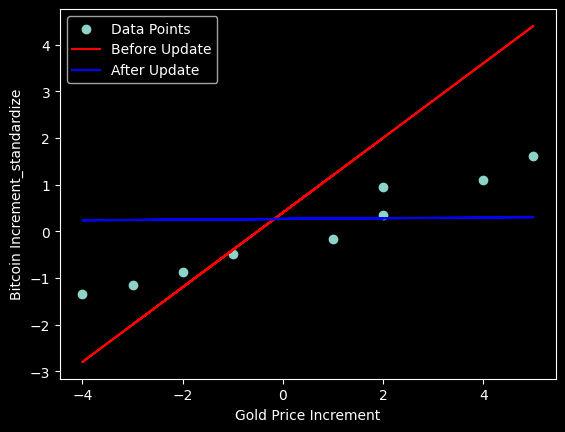

</details>

0.0074990847922647985


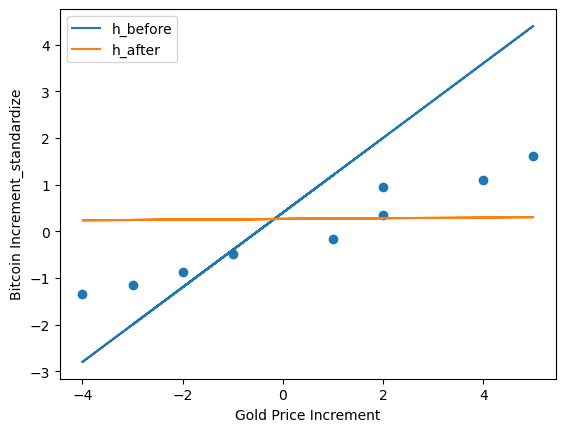

In [105]:
### START CODE HERE ###
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

h_before = theta_1*x + theta_0
grad_J_theta_1 = np.sum(2*(y-h_before)*(-x))
grad_J_theta_0 = np.sum(2*(y-h_before)*(-1))
theta_1 = theta_1-(alpha*grad_J_theta_1)
theta_0 = theta_0-(alpha*grad_J_theta_0)
h_after = theta_1*x + theta_0


### END CODE HERE ###

plt.scatter(x,y)
plt.xlabel("Gold Price Increment")
plt.ylabel('Bitcoin Increment_standardize')
plt.plot(x, h_before, label='h_before')
plt.plot(x, h_after, label='h_after')
plt.legend()

print(theta_1)

Now let's create N iterations of gradient descent, <span style='color: orange;'>***print all parameters and loss every iteration***</span> then <span style='color: orange;'>***plot the loss history***</span> and <span style='color: orange;'>***save the animation to show the change of model in each iteration to .gif***</span>.

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 \in [0,1], \theta_1 \in [0,1], learning\ rate = alpha$


In [106]:
### START CODE HERE ###
def gradient_descent(theta_0, theta_1,iterations,x,y,alpha=0.01):
    theta_0_history = []
    theta_1_history = []
    loss_history = []
    
    for i in range(iterations):
        
        h_before = theta_1*x + theta_0
        grad_J_theta_1 = np.sum(2*(y-h_before)*(-x))
        grad_J_theta_0 = np.sum(2*(y-h_before)*(-1))
        theta_1 = theta_1-(alpha*grad_J_theta_1)
        theta_0 = theta_0-(alpha*grad_J_theta_0)
        h_after = theta_1*x + theta_0
        
        loss = np.mean((y-h_after)**2)
        
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        loss_history.append(loss)
    
    
    return theta_0_history, theta_1_history, loss_history


    
### END CODE HERE ###

In [107]:
### START CODE HERE ###
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01
N = 30

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

loss_history.append(0)
# use  gradient_descent() here to estimate theta_0, theta_1 @all iterations

theta_0_history, theta_1_history, loss_history = gradient_descent(theta_0, theta_1,N,x,y,alpha=0.01)

#min = min(loss_history)
index = loss_history.index(np.min(loss_history))
# for i in range(loss_history):
#     if loss_history[i] == min:
#         print(i)
#         break

print(index)
print(min)
print(loss_history)
### END CODE HERE ###

29
0.04162427919655471
[1.0286693555847637, 0.4587504076049071, 0.23241948247728242, 0.13742772520459268, 0.09436352171204755, 0.07294901190707415, 0.06126382465082511, 0.05436988598729412, 0.05006697172470315, 0.047282037749947145, 0.04544007967782029, 0.04420664982959366, 0.043375016052756156, 0.04281217956108551, 0.042430482819140254, 0.042171343409851486, 0.04199530534710572, 0.04187568125658806, 0.041794378462622496, 0.04173911571269195, 0.04170155090862073, 0.04167601558396089, 0.04165865725612362, 0.041646857371884026, 0.0416388359859489, 0.04163338315482233, 0.04162967638852988, 0.04162715657361209, 0.04162544363329639, 0.04162427919655471]


### Show Figure of scatter plot of data and regression model (Red line) at each iteration
Try figure animation using FuncAnimation()**

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![SegmentLocal](parameter_update_animation.gif "segment")

</details>

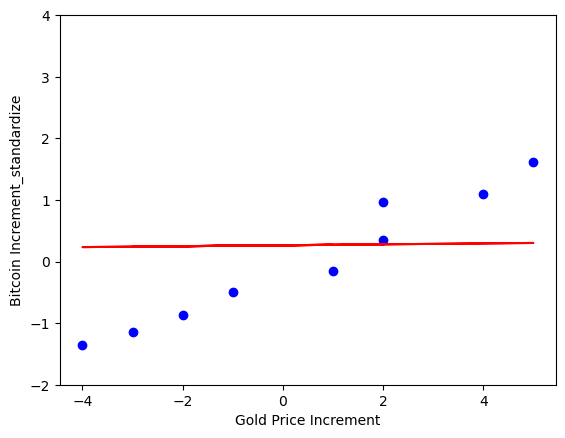

MovieWriter ffmpeg unavailable; using Pillow instead.


In [108]:
### START CODE HERE ###
def update(frame):
    h_after = theta_1_history[frame] * x + theta_0_history[frame] 
    line.set_data(x, h_after)
    iteration_text.set_text(f'Iteration: {frame}, Loss: {loss_history[frame]:.4f}')

fig, ax = plt.subplots()
sc = ax.scatter(x, y, color='blue', label='Data')
line, = ax.plot(x, theta_1_history[0]*x + theta_0_history[0], color='red', label='Regression Line')

ax.set_xlabel('Gold Price Increment')
ax.set_ylabel('Bitcoin Increment_standardize')
ax.set_ylim(-2, 4)

iteration_text = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center')
animation = FuncAnimation(fig, update, N, interval=100, repeat=False)
plt.show()

animation.save('gradient_descent.gif', writer = 'ffmpeg', fps = 6) 
### END CODE HERE ###

### Create the `Predicted_standardize` columns from the best parameters set

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize |
|----------------------|-------------------|-------------------------------|------------------------|
| -1                | 846                           | -0.493265              | -0.169845              |
| -4                | 424                           | -1.351452              | -1.063912              |
| 2                 | 1560                          | 0.958738               | 0.724223               |
| -3                | 523                           | -1.150124              | -0.765890              |



</details>

In [109]:
### START CODE HERE ###

df['Predicted_standardize'] = theta_1_history[-1]*df['Gold Price Increment'] + theta_0_history[-1]

### END CODE HERE ###
df[['Gold Price Increment', 'Bitcoin Increment', 'Bitcoin Increment_standardize', 'Predicted_standardize']].head(4)

,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize
0,-1,846,-0.493265,-0.477972
1,-4,424,-1.351452,-1.473903
2,2,1560,0.958738,0.517959
3,-3,523,-1.150124,-1.141926


Create the `Predicted` that inverse standardize of `Predicted_standardize`


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize | Predicted       |
|----------------------|-------------------|-------------------------------|------------------------|-----------------|
| -1                | 846                           | -0.493265              | -0.239102	   | 970.981043| 1005.037081     |
| -4                | 424                           | -1.351452              | -1.148680	   | 523.710247     |
| 2                 | 1560                          | 0.958738               | 0.670476	       | 1418.251840     |
| -3                | 523                           | -1.150124              | -0.845487	   | 672.800513     |



</details>

In [110]:
### START CODE HERE ###

df['Predicted'] = df['Predicted_standardize']*df['Bitcoin Increment'].std() +df['Bitcoin Increment'].mean()

### END CODE HERE ###
df[['Gold Price Increment', 'Bitcoin Increment', 'Bitcoin Increment_standardize', 'Predicted_standardize','Predicted']].head(5)

,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize,Predicted
0,-1,846,-0.493265,-0.477972,839.262894
1,-4,424,-1.351452,-1.473903,319.822021
2,2,1560,0.958738,0.517959,1358.703767
3,-3,523,-1.150124,-1.141926,492.968979
4,1,1012,-0.155685,0.185982,1185.556809


## Question
1. What would be the iteration that gives the best parameters?
2. What are the best regression model parameters?
3. Show regression model equation of best parameters compared to the regression model equation from the last iteration (#30) 

In [111]:
# Ans